<h3>Lab 9</h3>

# The Environment Redux: Modelling Environmental Trends

<div>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   <img src="extreme-weather.jpg" width=60%/>
</div>
<br>

#### _Modelling Time!_

_Time to enjoy the fruits of our labour over the semester!_

In our financial case study (GDP per Capita) we looked at ways of quantitatively identifying or *modelling* trends in data.

We can now apply these new tools along with all our "numpy know-how" to identify trends in some of our other case studies. In this lab we will focus again on the environment, starting with the sea level data.

## Modelling the Sea Level Data

We will begin by examining the sea level data from the Case Study _Will UWA Go Under Water_ (Sea Levels). Recall that this case study used sea level measurements from the National Oceanography Centre's [Permanent Service for Mean Sea Level](https://www.psmsl.org/) (PSMSL). We focussed on the Fremantle station, which had longitudinal data dating back to 1897.

### Data acquisition and cleaning

The data acquisition was covered in the Case Study. We'll use the same source here and once again make use of the data from the Fremantle monitoring station (Station 111). The original data is provided in the file `111.rlrdata.txt` included with this lab.

* Have another look at this data to refresh your memory of the format.

Recall there were some [Data Notes](https://www.psmsl.org/data/obtaining/notes.php) that explained the columns, or *fields*, in more detail.


#### Loading the data

We also have some more efficient tools now for processing the data, and this time we'll read them straight into numpy arrays.

Recall that last time we stored each column in a list, and combined them into a list of tuples where needed by 'zipping' the lists together.

This time we will instead store all the relevant columns in a single 2-D array.

We found from the Case Study that the flags (column 4) didn't provide us with any information, so we are going to store the first 3 columns in an $n \times 3$ array (that is, some number $n$ rows, and 3 columns).

Since we are only dealing with numerical data this will provide a concise and efficient way of doing it. One disadvantage is that we will no longer have the variables like `dates` and `msls` (mean sea levels) to refer to the data in the different fields, so we will use constants for the column indices instead. (We will see another way to do this in the next case study!)

So if our data is in an $n \times 3$ array called, say, `sealevel_data`, we know we can pick out the columns using array selection. For example we could get the date column using `sealevel_data[:,0]` (all rows, column 0).

So its easier to read and debug, we'll again use a meaningful constants (say DATE for the date column, and another for the mean sea level column, and so on). Then we can instead write `sealevel_data[:,DATE]`. This immediately shows the intent of the code, and makes it easier to read and maintain.

Let's start with the following constants:

In [2]:
import numpy as np
dates = np.array([2018.0,2019.0,2020.0,2021.0])
np.nonzero(dates == 2020)[0]

array([2])

In [3]:
FREO_DATA = '111.rlrdata.txt'
(DATE, MSL, MISSING) = (0, 1, 2)

We'll use another numpy convenience method to load the text, this time `np.loadtxt()`.

* Read the first 3 columns of the sea level data into an array using `np.loadtxt()` (1 line of code). Check the array shape and data type are as you would expect.

_Tip: You don't need to use array selection to remove the fourth column, check the API._

Because arrays are homogenous, numpy will attempt to find the *least general* data type to which it can cast *all* of the data. What should you expect in this case?

* Print the `dtype` and see if you were right.

In [4]:
sealevel_array = np.loadtxt(FREO_DATA,delimiter=";",usecols = (0,1,2))

sealevel_array

array([[1897.0417, 6542.    ,    9.    ],
       [1897.125 , 6524.    ,    0.    ],
       [1897.2083, 6557.    ,    0.    ],
       ...,
       [2019.7917, 6700.    ,    0.    ],
       [2019.875 , 6686.    ,    0.    ],
       [2019.9583, 6777.    ,    0.    ]])

In [5]:
sealevel_array.dtype

dtype('float64')

In [6]:
sealevel_array.shape

(1476, 3)

#### Cleaning the data

The next step was to remove the dates (months) with missing data. These had the mean sea level recorded as -99999.

To do this we introduced the idea of masking, and masked each list (dates, msls and missing days) separately.

With a 2-D array we can mask _all the columns at once_. Remember that "masking" is just a form of selection where we use a boolean (or integer) array. In this case, we'll apply that selection to the rows, and take all the columns.

* Use masking/selection (no loops) to create a new array with the lines with missing readings removed. (About 2 lines of code)

As usual, as a 'sanity check' output the resulting shape. Is it what you expected?



In [7]:
mask = np.logical_not(np.isclose(sealevel_array[:,MSL], -99999))

In [8]:
sealevel_array_2 = sealevel_array [mask,]
sealevel_array_2.shape

(1367, 3)

Recall that we adopted a data cleaning policy where we rejected *any month with more than 5 missing days*.

* Use masking/selection to create a new array with the months with more than 5 missing days removed. (~2 lines)

As usual check the shape.

In [9]:
mask_2 = np.logical_not(sealevel_array_2[:,MISSING]>5)
sealevel_array_3 = sealevel_array_2 [mask_2,]
sealevel_array_3.shape

(1339, 3)

#### Q1. Putting it together [1 lab mark]

* Write a function `get_clean_data(station_data)` that:
  * reads in the data from the filename in `station_data`
  * removes any missing months
  * removes any months with 6 or more missing days
  * returns an $n \times 2$ array of floats containing the remaining dates and mean sea levels
  
Your function should use numpy arrays. It should not use lists or loops. You may assume the above assignments to the global constants DATE, MSL and MISSING (that is, they don't need to be passed into the function). (~ 6 lines)

Check your answers.

In [10]:
def get_clean_data(station_data):
    array_1 = np.loadtxt(station_data,delimiter=";",usecols = (0,1,2))
    mask_1 = np.logical_not(np.isclose(array_1[:,MSL], -99999))
    array_2 = array_1 [mask_1,]
    mask_2 = np.logical_not(array_2[:,MISSING]>=6)
    array_3 = array_2 [mask_2,]
    return array_3[:,[DATE,MSL]]

In [11]:
from nose.tools import assert_equal, assert_true
freo_data = get_clean_data(FREO_DATA)
assert_true(np.isclose(freo_data[0], np.array([1897.125, 6524])).all())
print("So far, so good. Please continue with your own testing.")


So far, so good. Please continue with your own testing.


## Data Visualisation and Modelling

We'll start from one of the points we got to in _Sea Levels_, but replicate it directly from numpy.

* Produce a scatter plot of the Fremantle data, along with a line showing the mean.
  * Set the transparency (alpha value) of the scatter plot to 0.5.
  * Draw the mean as a yellow line, with a line width of 4.
  * Include a legend.

Your graph should look like this.

<div>
<img src="mean.png" width="600">
</div>



In [12]:
import matplotlib.pyplot as plt

In [13]:
freo_sealevel = get_clean_data(FREO_DATA)
np.mean(freo_sealevel[:,MSL])

6709.684839432412

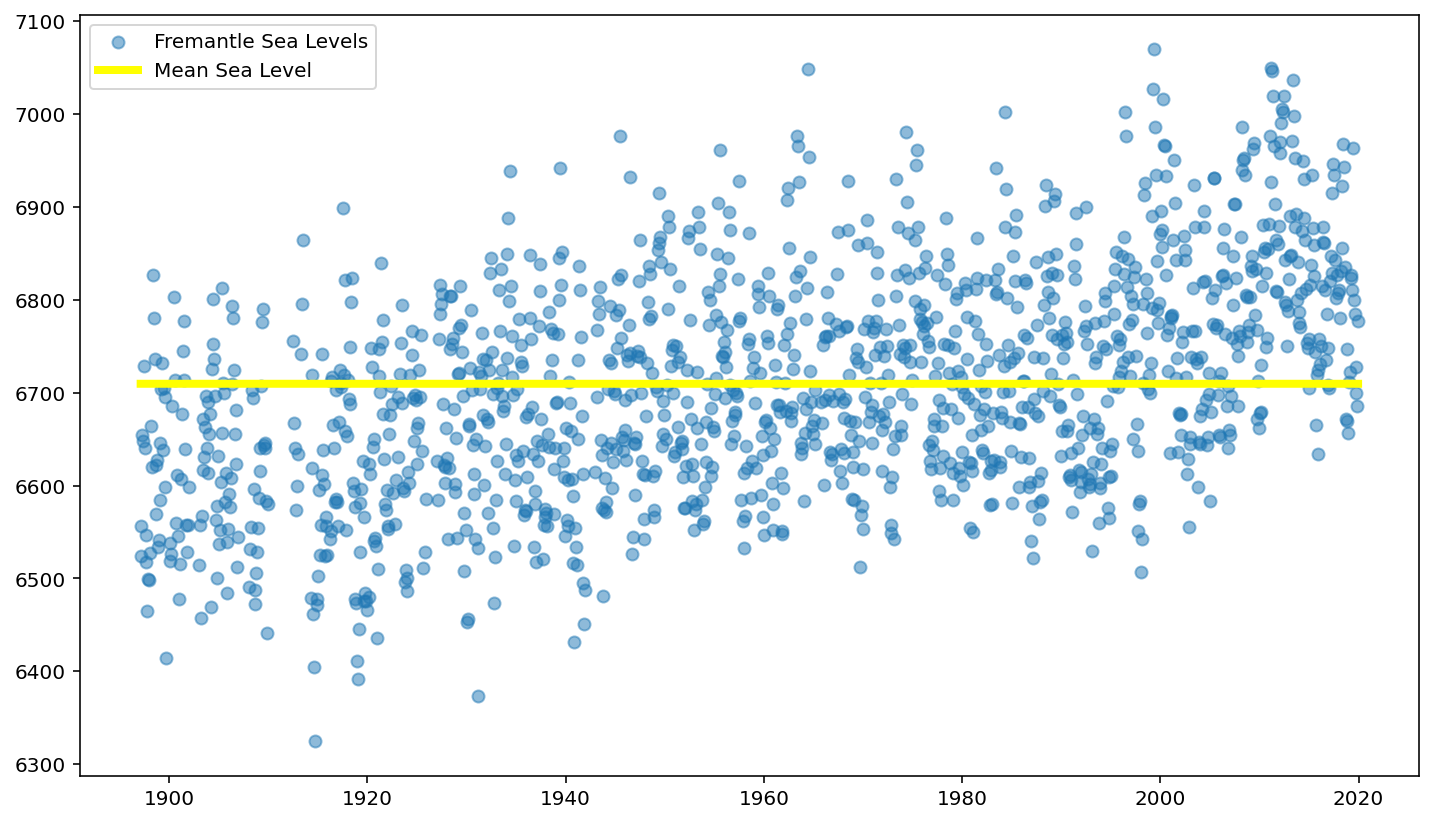

In [14]:
plt.scatter(freo_sealevel[:,DATE],freo_sealevel[:,MSL],alpha=0.5,label="Fremantle Sea Levels")
plt.plot(freo_sealevel[:,DATE],np.ones_like(freo_sealevel[:,DATE])* np.mean(freo_sealevel[:,MSL]),color="yellow", linewidth=4, label = "Mean Sea Level")
plt.legend()

### Linear Regression and `scipy.stats`

In the lectures we do linear regression from first principles. We also introduced the `scikit-learn` library. In this lab we'll explore some more libraries that are handy for future use.

For this section, we'll briefly introduce a very useful library - the [`scipy.stats` library](https://docs.scipy.org/doc/scipy/reference/stats.html) - another part of the "Scientific Python" collection.

* Look for the heading *Correlation functions* and find the `linregress()` method. Have a look at its API.

You'll see that it performs a linear regression computation for you and returns a 5-tuple. We will make use of the `slope` and `intercept`, but the function also returns some other statistics relating to the confidence of the observed relationship between the x and y data.

_Note: While we're on that page, notice in the "See also:" section, that there is another handy SciPy library, `scipy.optimize`, that will perform least squares optimisation (like we did in the GDP case study) on arbitrary functions._

* Import `linregress` and use it to plot a linear model against the sea level data.

_Tip: Use the form of `linregress` that doesn't require you to use the second ('y') parameter, in order to take the 2-D array directly._

Plot the linear model in red with a line width of four, and an appropriate legend.


In [15]:
import scipy.stats as stats

In [16]:
result = stats.linregress(freo_sealevel)
result

LinregressResult(slope=1.6581679616831926, intercept=3456.2172482274773, rvalue=0.48637297075689967, pvalue=1.9333840077330608e-80, stderr=0.08146690526905906, intercept_stderr=159.87002016261764)

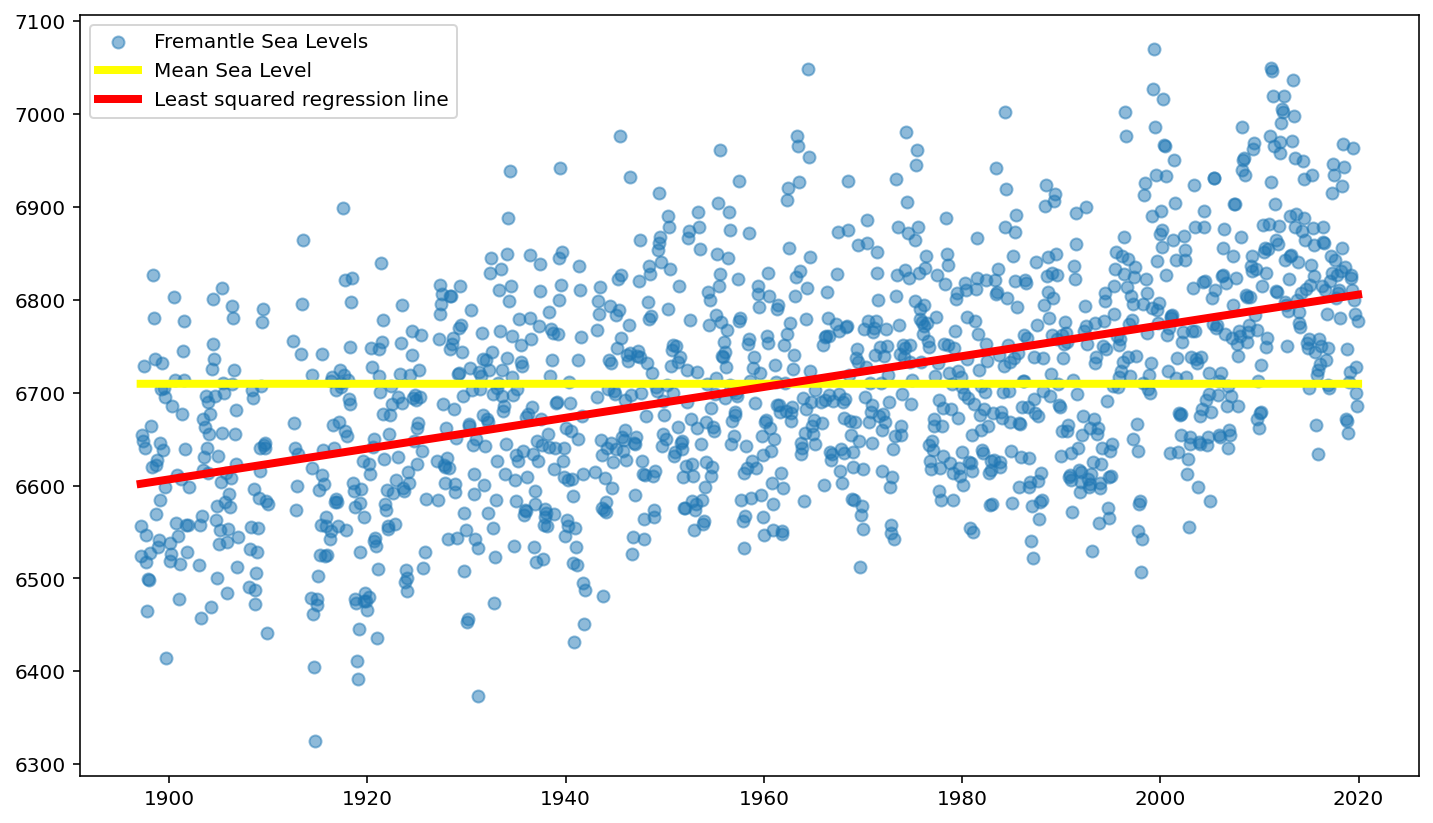

In [17]:
plt.scatter(freo_sealevel[:,DATE],freo_sealevel[:,MSL],alpha=0.5,label="Fremantle Sea Levels")
plt.plot(freo_sealevel[:,DATE],np.ones_like(freo_sealevel[:,DATE])* np.mean(freo_sealevel[:,MSL]),color="yellow", linewidth=4, label = "Mean Sea Level")
plt.plot(freo_sealevel[:,DATE],result[1]+freo_sealevel[:,DATE]*result[0],color="red", linewidth=4, label = "Least squared regression line")
plt.legend()

* According to your model, what is the rate of increase (to two decimal places) in sea level?

To answer this you will need to consider what units the slope is expressed in.

* Print out the rate of increase with the appropriate units.

In [18]:
"The Freo sealeave is increasing at a rate of {rate:.2f} mm/year ".format(rate = result[0])

'The Freo sealeave is increasing at a rate of 1.66 mm/year '

#### Q2. Predicting the sea level [1 lab mark]

* Write a method `predicted_level(historical_data, datetime)` that takes a set of historical data in the format returned by `get_clean_data()` and a "`datetime`" (see below) and returns the predicted sea level at that datetime in *metres*, rounded to 2 decimal places.

For this data we'll simply represent the 'datetime' as a float. The whole part of the float represents the year (a little like we did in the GDP case study). The fractional part represents a fraction of a year. So, for example, 2020 represents midnight on the last day of 2019, and 2020.5 represents the halfway point of 2020.

For our modelling we'll assume that the dates in `111.rlrdata` are expressed in this format. We know that this is not quite true and will introduce a small error, because the dates are expressed as the midpoints of months, assuming each month is one twelfth of a year (which is not quite accurate). So the representation of time used by The Permanent Service for Mean Sea Level is actually nonlinear! We could fix this, but it would distract from the aims of the lab.

_Mini-challenge: What is the most it can be out by? (That is, the largest error in datetime this will introduce?)_

---

* What does your model predict the mean sea level will be in 2020? Add some grid lines to your plot to see if this rings true.
* What does your model predict the mean sea level will be in 2050? 2100? 3000?


In [19]:
def predicted_level(historical_data, datetime):
    result = stats.linregress(historical_data)
    return round((datetime*result[0]+result[1])/1000,2)

In [20]:
freo_data = get_clean_data(FREO_DATA)
assert_true(np.isclose(predicted_level(freo_data, 2020), 6.81))
assert_true(np.isclose(predicted_level(freo_data, 2080), 6.91))
print("So far so good. You should do your own testing.")


So far so good. You should do your own testing.


As we saw in the GDP case study, there may be differences between shorter term trends and longer term trends.

* Repeat your linear model plot from above, but this time add an extra black line showing the linear trend for only the *second half of the data*. Be sure to include a legend.

Should there be an odd number of data points, include the midpoint in the second half. Use a linewidth of 4 for all lines.

Tip: You may find the `np.ceil()` function useful.

* What is the rate of increase for the second half of the data? How does this compare with the data as a whole?

Does this suggest the _rate of change_ is increasing or decreasing?

* What are the predicted sea levels for 2020, 2050, 2100 and 3000 using the second half of the data? How do these compare with the whole data?


In [21]:
midpoint = int(np.ceil(len(freo_sealevel[:,DATE])/2))
midpoint



670

In [100]:
result_2 = stats.linregress(freo_sealevel[midpoint:,])

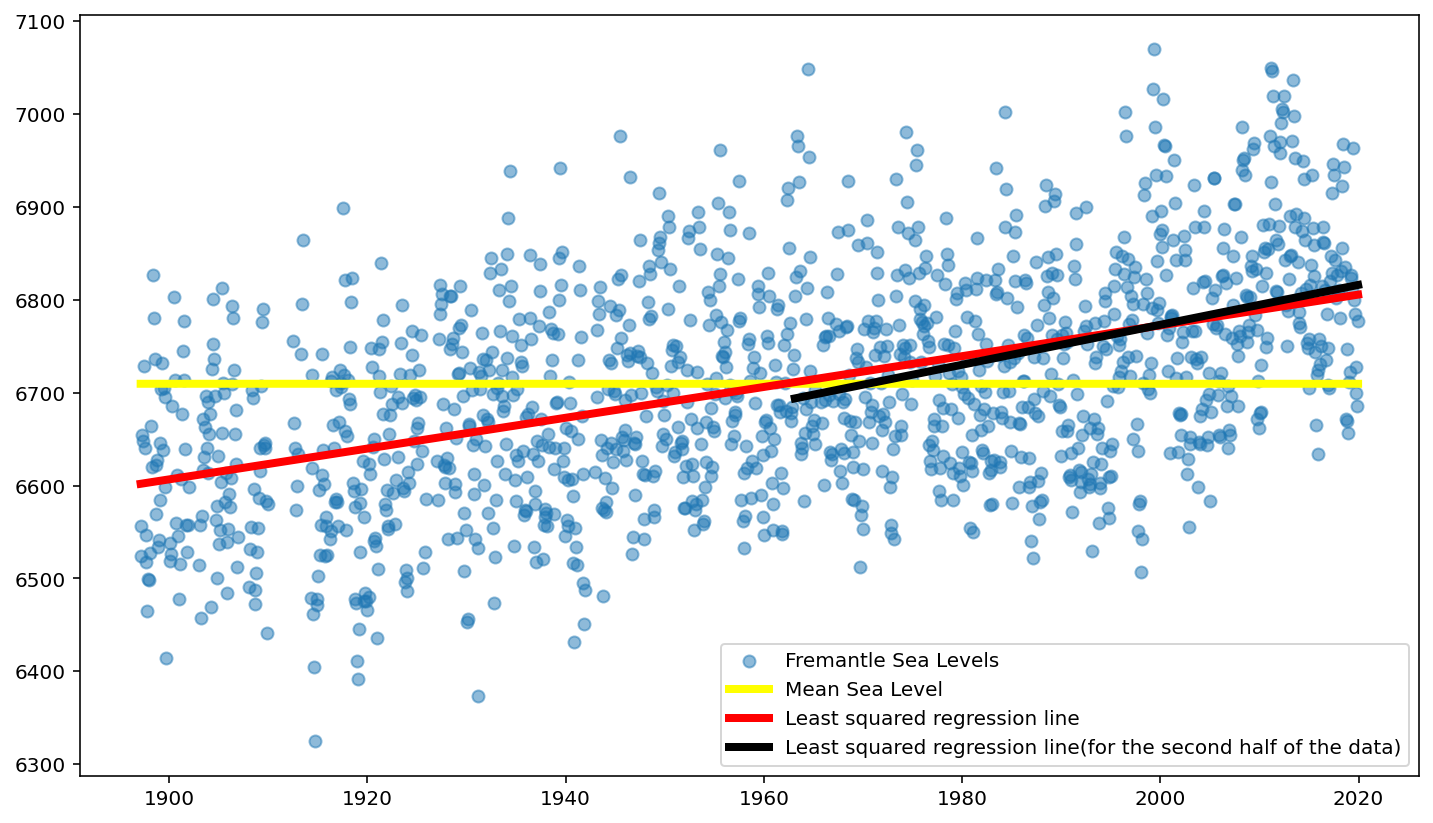

In [106]:
plt.scatter(freo_sealevel[:,DATE],freo_sealevel[:,MSL],alpha=0.5,label="Fremantle Sea Levels")
plt.plot(freo_sealevel[:,DATE],np.ones_like(freo_sealevel[:,DATE])* np.mean(freo_sealevel[:,MSL]),color="yellow", linewidth=4, label = "Mean Sea Level")
plt.plot(freo_sealevel[:,DATE],result[1]+freo_sealevel[:,DATE]*result[0],color="red", linewidth=4, label = "Least squared regression line")
plt.plot(freo_sealevel[midpoint:,DATE],result_2[1]+freo_sealevel[midpoint:,DATE]*result_2[0],color="black", linewidth=4, label = "Least squared regression line(for the second half of the data)")
plt.legend()

### Piecewise linear models

Extending on the above idea, we will generate a piecewise linear model for the whole data. Unlike our previous piecewise linear models, our line segments will not have zero slope, but will be fitted to the data using linear regression.

* Divide the data into quartiles (4 segments). Again plot the data points, and plot the linear model in red. Plot the four new segments in black.

This time, use `numpy.array_split()` to divide the data in four.

In [121]:
split_array = np.array_split(freo_sealevel,4,0)

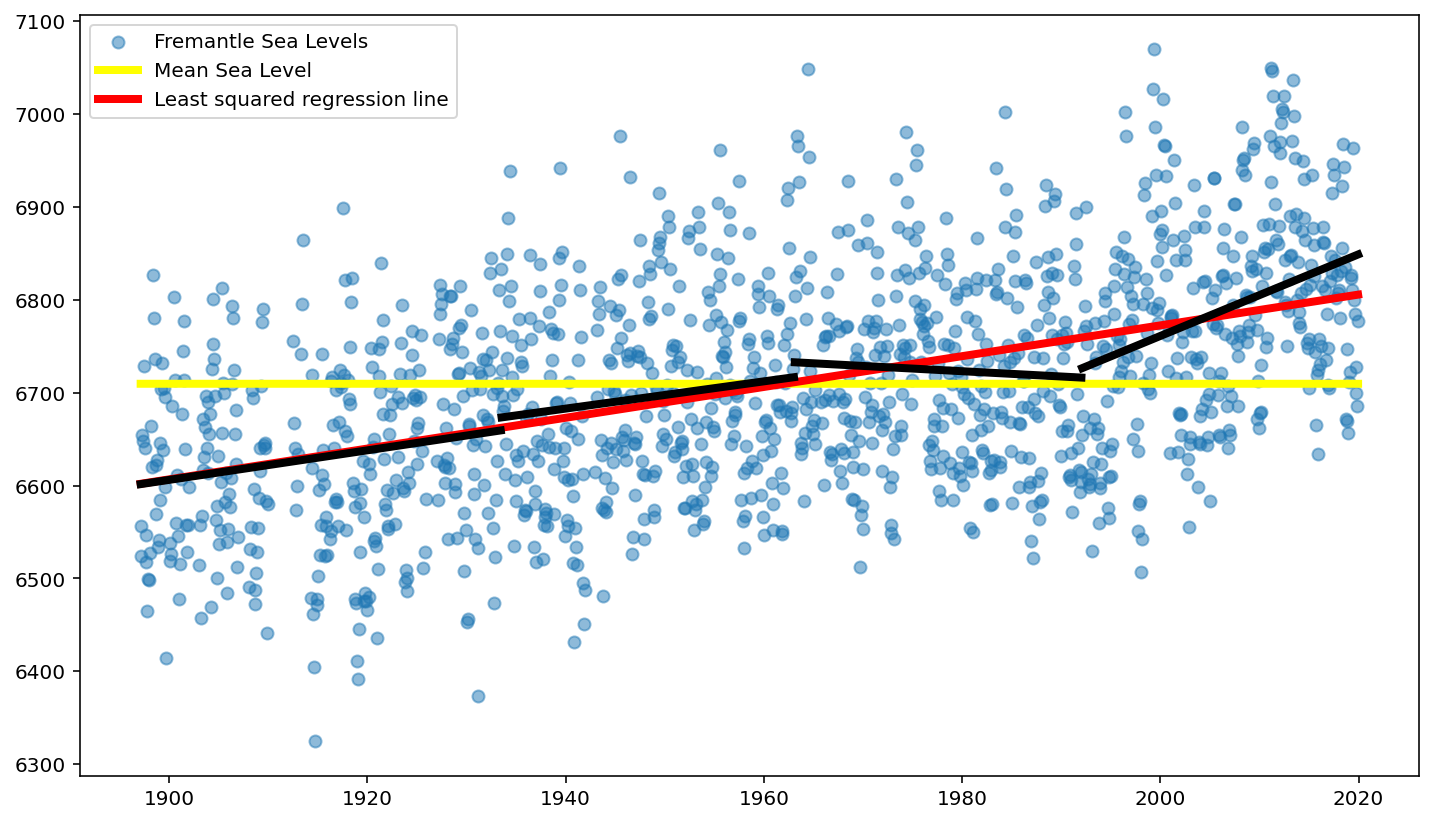

In [114]:
plt.scatter(freo_sealevel[:,DATE],freo_sealevel[:,MSL],alpha=0.5,label="Fremantle Sea Levels")
plt.plot(freo_sealevel[:,DATE],np.ones_like(freo_sealevel[:,DATE])* np.mean(freo_sealevel[:,MSL]),color="yellow", linewidth=4, label = "Mean Sea Level")
plt.plot(freo_sealevel[:,DATE],result[1]+freo_sealevel[:,DATE]*result[0],color="red", linewidth=4, label = "Least squared regression line")
for segment in np.array_split(freo_sealevel,4,0):
    res = stats.linregress(segment)
    plt.plot(segment[:,DATE],res[1]+segment[:,DATE]*res[0],color = "black", linewidth = 4)
plt.legend()

#### Q3. Piecewise linear modelling function [1 lab mark]

* Write a function `piecewise_linear(data, segments, quiet=False)` that:
  * takes a set of data in the format returned by `get_clean_data()`
  * takes a number of segments, `segments`, into which to split the data (as split by `numpy.array_split()`)
  * takes a boolean argument `quiet` that can be used to 'turn off' the graphical output, and defaults to False
  * if `quiet` is False, plots the data points, line of best fit (linear model) for the whole data, and "segments" line segments fitting each of the segments of data
  * returns a "segments x 2" array of parameters for the linear 'pieces' where:
    * the first column contains the slopes for each segment
    * the second column contains the y-intercepts for each segment

For example, for 10 segments your output should look like this:

<div>
<img src="segments.png" width="600">
</div>



In [138]:
def piecewise_linear(data, segments, quiet=False):
    split_array = np.array_split(data,segments,0)
    res = []
    for segment in split_array:
        res.append([stats.linregress(segment)[0],stats.linregress(segment)[1]])
    if not quiet:
        plt.scatter(data[:,DATE],data[:,MSL],alpha=0.5)
        result = stats.linregress(data)
        plt.plot(data[:,DATE],result[1]+ data[:,DATE]*result[0],color="red", linewidth=4) 
        idx = 0
        for segment in split_array:
            plt.plot(segment[:,DATE],res[idx][1]+segment[:,DATE]*res[idx][0],color="black",linewidth=4)
            idx += 1
    return np.array(res)
            
            
    


In [140]:
freo_data = get_clean_data(FREO_DATA)
parameters = piecewise_linear(freo_data, 10, True)
assert_true(np.isclose(parameters[3,:], np.array([ 8.00435815e+00, -8.87899164e+03])).all())
assert_true(np.isclose(parameters[:,0], np.array([ 1.92811184,  8.25061015,  0.94959073,  8.00435815,  1.38211083,
       -0.48934848, -1.22357932,  5.51171932,  1.36488971, -6.27671185])).all())
print("So far, so good. Please continue with your own testing.")


So far, so good. Please continue with your own testing.


array([[ 1.92811184e+00,  2.95040994e+03],
       [ 8.25061015e+00, -9.22098761e+03],
       [ 9.49590730e-01,  4.83638166e+03],
       [ 8.00435815e+00, -8.87899164e+03],
       [ 1.38211083e+00,  3.99870131e+03],
       [-4.89348476e-01,  7.69155852e+03],
       [-1.22357932e+00,  9.14995045e+03],
       [ 5.51171932e+00, -4.25970719e+03],
       [ 1.36488971e+00,  4.04168021e+03],
       [-6.27671185e+00,  1.94738589e+04]])

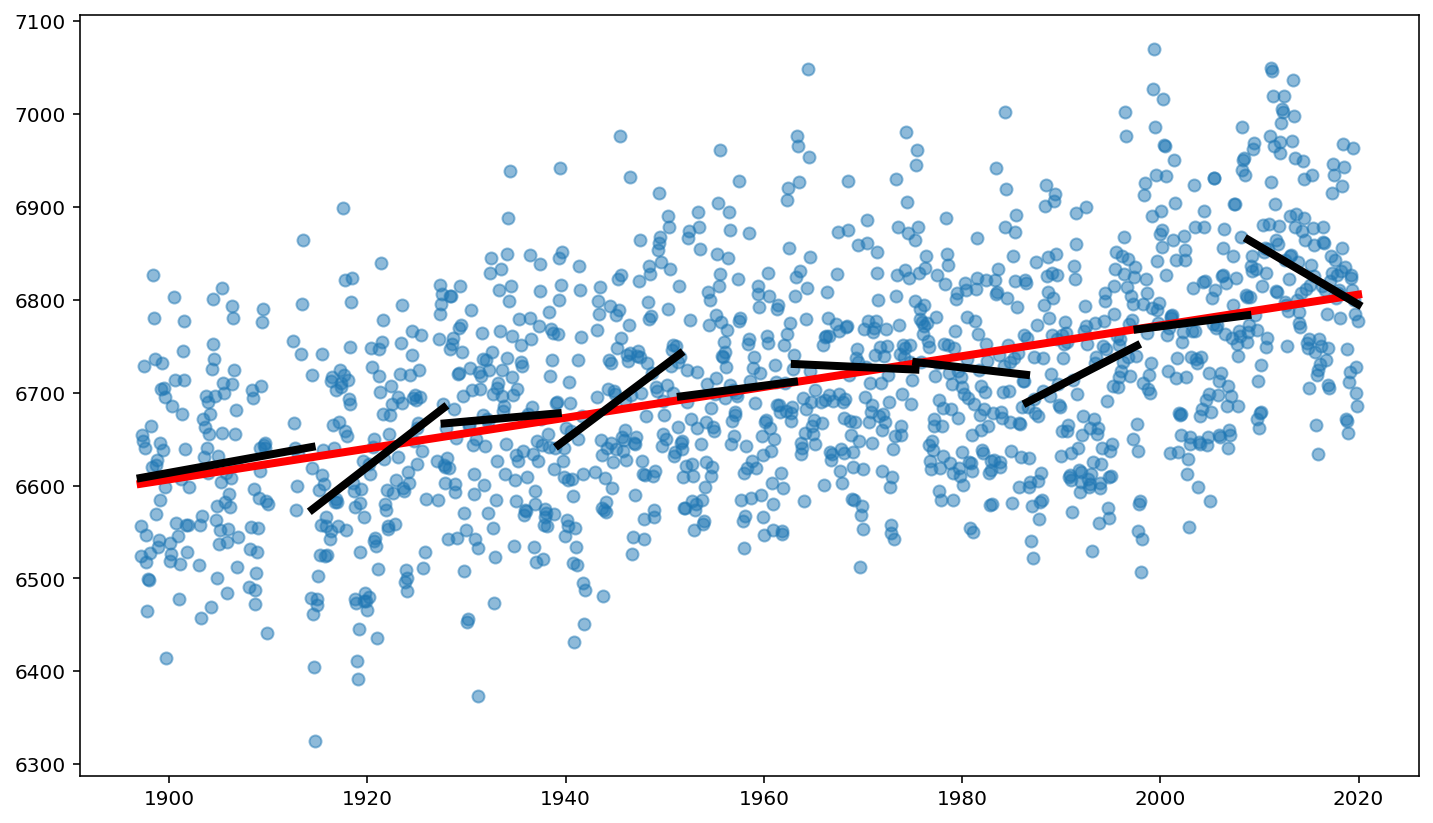

In [139]:
freo_data = get_clean_data(FREO_DATA)
piecewise_linear(freo_data, 10, False)

The above model is quite disjoint. An alternative is to join the midpoints of each line segment. Or alternatively, join the means of each data segment.

* On a new version of your function from above, plot an additional line by:
  * finding the median of the dates in each segment of data (xs)
  * finding the mean of the sample points (sea levels) in each segment of data (ys)
  * plotting a line of the ys against the xs (in a new colour)

You should have a single piecewise-linear line joining up the individual segments.

Try this for different numbers of segments, ranging from about 3 to 100. What do you notice as you get to higher numbers of segments? (How does this relate to a rolling average?)

What sort of numbers would you say offer a reasonably useful/informative model?

In [164]:
def piecewise_linear_2(data, segments, quiet=False):
    split_array = np.array_split(data,segments,0)
    res = []
    for segment in split_array:
        res.append([stats.linregress(segment)[0],stats.linregress(segment)[1]])
    if not quiet:
        plt.scatter(data[:,DATE],data[:,MSL],alpha=0.5)
        result = stats.linregress(data)
        plt.plot(data[:,DATE],result[1]+ data[:,DATE]*result[0],color="red", linewidth=4) 
        idx = 0
        medians = []
        means = []
        for segment in split_array:
            medians.append(segment[int(np.ceil(len(segment)/2)),DATE])
            means.append(np.mean(segment[:,MSL]))
            plt.plot(segment[:,DATE],res[idx][1]+segment[:,DATE]*res[idx][0],color="black",linewidth=2)
            idx += 1
        plt.plot(medians,means,color = "yellow",linewidth = 3)
    

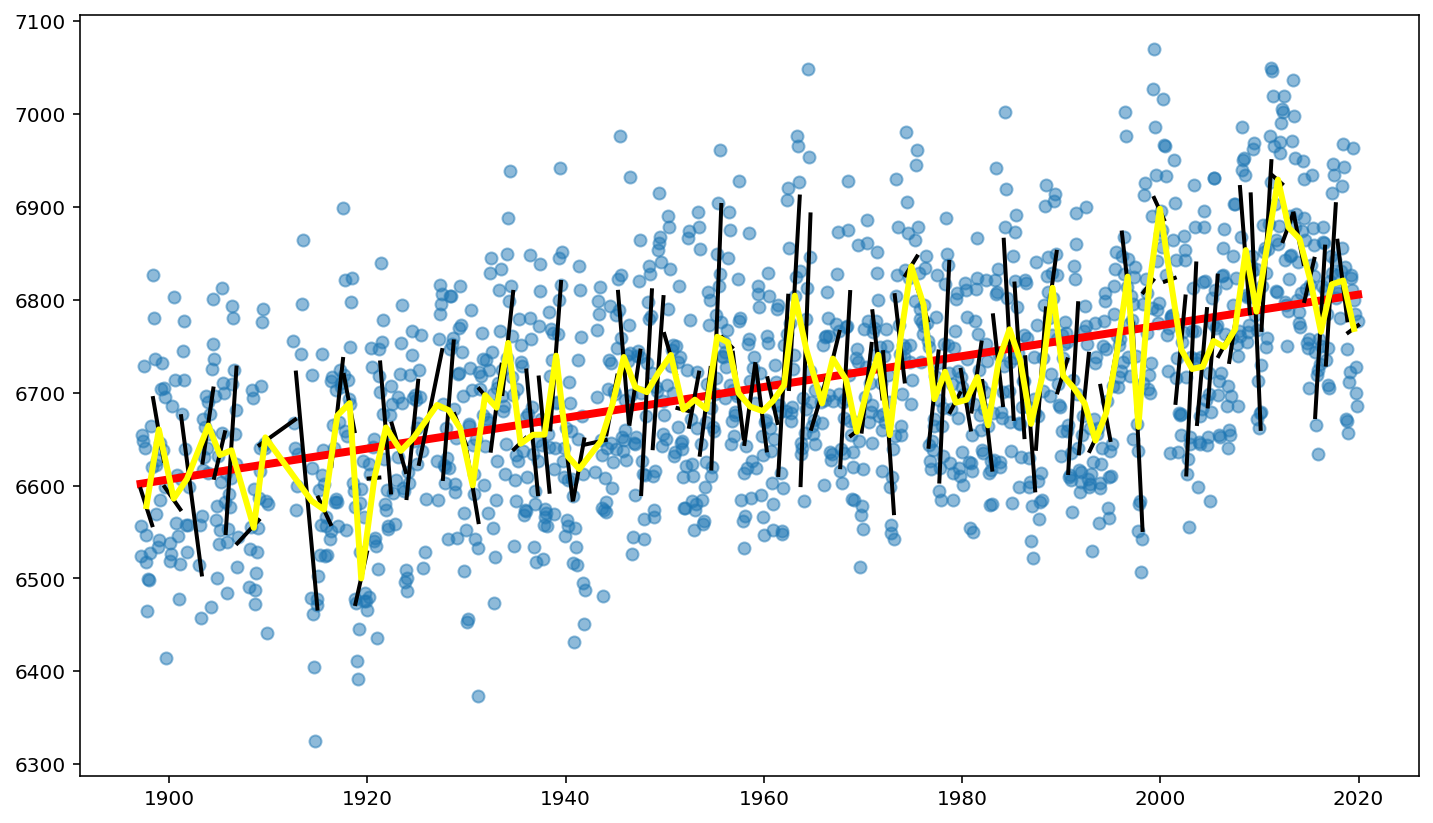

In [167]:
freo_data = get_clean_data(FREO_DATA)
piecewise_linear_2(freo_data, 100, False)

## Polynomial Models and `scikit-learn`

In this unit we have made a point of not using 'black box' code from libraries before we understand it well enough that we could write the code ourselves.

We are going to make one exception with regression on polynomials (as it would take a lot of time to do it in detail). However, as mentioned in the lectures, we know conceptually how we would do it:
 * we know that there will be a number of parameters (or coefficients) based on the order (or degree) of the polynomial function
 * we know that there will be an error function, such as MSE, typically based on least squared error
 * we know that the code will try to choose parameters that minimise that error

So that we can see how polynomial models work for our data we'll use the machine learning toolkit `scikit-learn` and provide some 'helper functions' so that we can just use it without needing to go into the details.

In [171]:
# provided code, no need to memorise
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def fit_polynomial_model(xs, ys, order=1):
    model = Pipeline([('poly', PolynomialFeatures(degree=order)), ('linear', LinearRegression())])
    model.fit(xs.reshape(-1,1), ys)
    return model

def get_predictions(model, xs):
    predictions = model.predict(xs.reshape(-1,1))
    return predictions

#### Linear model

* Using the two functions above, plot the data with a first-order polynomial model.

Because we'll be plotting a number of lines on the same graph, this time we'll use the default colour cycle. So that the first line is not the same colour as the scatter plot, use `plt.plot()` rather than `plt.scatter()` to produce the scatter plot. You can do this by setting the linestyle to None, and the marker to a circle:

```
plt.plot(my_xs, my_ys, 'o', ls=' ', alpha=0.5, label='Fremantle Sea Levels')
```

Your output should look like this:

<div>
<img src="firstorder.png" width="600">
</div>


In [169]:
freo_data = get_clean_data(FREO_DATA)

#### Second-order model

Based on your earlier work with the line segments, you have probably made some predictions about which way a second-order model will "bend".

* Add a second-order model to your plot (using the `order` parameter).

Does it bend in the direction you expected? Does it bend as much as you anticipated? If not, why do you think this is the case?



#### Higher-order models

* Add a third-order polynomial model to your plot.

Is this more what you might have anticipated? If so, why do you think the 3rd order model is better able to achieve it?

* Try adding a fouth-degree polynomial model to your plot.

Does the extra degree of freedom add any value? 

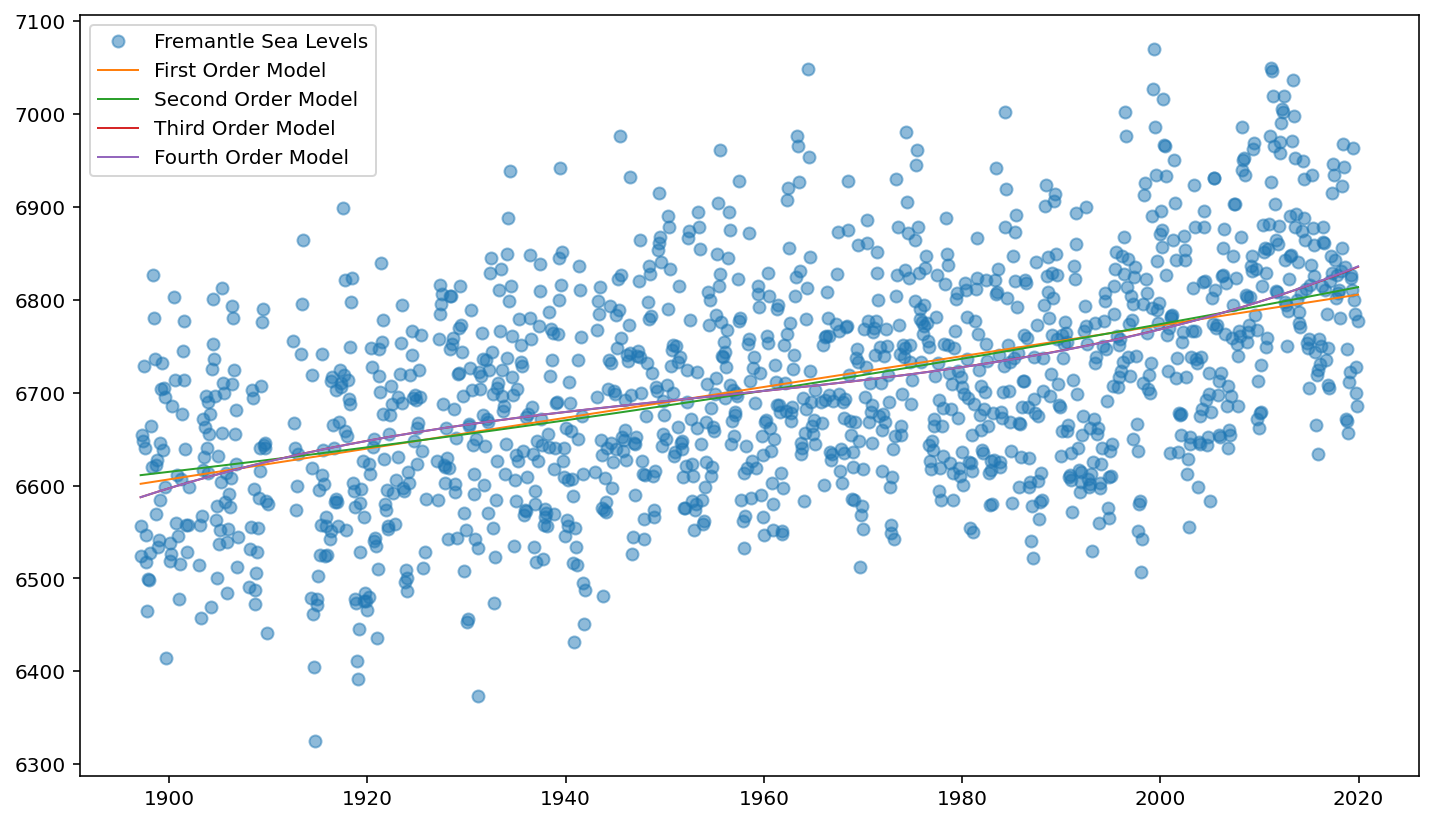

In [181]:
plt.plot(freo_data[:,DATE],freo_data[:,MSL],'o',ls=' ',alpha=0.5,label='Fremantle Sea Levels')
first_m = fit_polynomial_model(freo_data[:,DATE], freo_data[:,MSL], order=1)
first_y = get_predictions(first_m, freo_data[:,DATE])
plt.plot(freo_data[:,DATE], first_y,linewidth=1, label='First Order Model')
second_m = fit_polynomial_model(freo_data[:,DATE], freo_data[:,MSL], order=2)
second_y = get_predictions(second_m, freo_data[:,DATE])
plt.plot(freo_data[:,DATE], second_y,linewidth=1, label='Second Order Model')
third_m = fit_polynomial_model(freo_data[:,DATE], freo_data[:,MSL], order=3)
third_y = get_predictions(third_m, freo_data[:,DATE])
plt.plot(freo_data[:,DATE], third_y,linewidth=1, label='Third Order Model')
fourth_m = fit_polynomial_model(freo_data[:,DATE], freo_data[:,MSL], order=4)
fourth_y = get_predictions(fourth_m, freo_data[:,DATE])
plt.plot(freo_data[:,DATE], fourth_y,linewidth=1, label='Fourth Order Model')
plt.legend()

### Sea level modelling conclusions - scenario planning and risk mitigation

* Given the length of time-series you have available, and all the modelling you've done, what would you suggest is the "best" model (or models) for the data?

Note that the best model is subjective - there is not a single right answer.

Because there is never a single "right" model, a sensible approach (which doesn't seem to be taken often enough in today's politics) is to engage in *scenario planning* - looking at a number of reasonable models and their implications, and planning accordingly.

The more potentially damaging or catastrophic the impacts of a scenario, the more important it is to include "*worst case models*" and mitigate against the risks. This is known as *risk mitigation*.

* What are the potential implications of your different sea-level models for the world?

## Regression Models for Rainfall and Temperature

The general trend in the sea level data, given the length of time over which it was recorded, was fairly easy to recognise with the 'naked eye'. The rainfall data (from the Rainfall lab) and temperature data (from the Heat labs) were not as clear cut.

We did some quanititative analysis using stepwise linear models based on means.

We now have the tools to do a more comprehensive quantitative analysis using polynomial models!

Using a _new notebook_ (it will be faster to not have all the datasets in memory), investigate those data and see what you find!

## Challenge

In the _CensusAge_ lab we implemented a "spread" function to "interpolate" the age data for age bands above 80. At the end you were asked to think about more realistic ways of spreading the individuals amongst the age categories.

Could any of your modelling techniques be used as a more justifiable way of augmenting the data? Give this a try!

&copy; Cara MacNish, UWA